In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline  
plt.style.use('ggplot')

# Import Data

In [3]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv"
data = pd.read_csv(url)
print(data.columns)

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')


In [47]:
tags = data.as_matrix(['Species'])
X = data.as_matrix(['Sepal.Length', 'Petal.Width'])
sX = X[0:50, :] # setosa vectors
cX = X[50:100,:] # versicolor vectors
vX = X[100:,:] # virginica vectors

# Plot Labeled Data

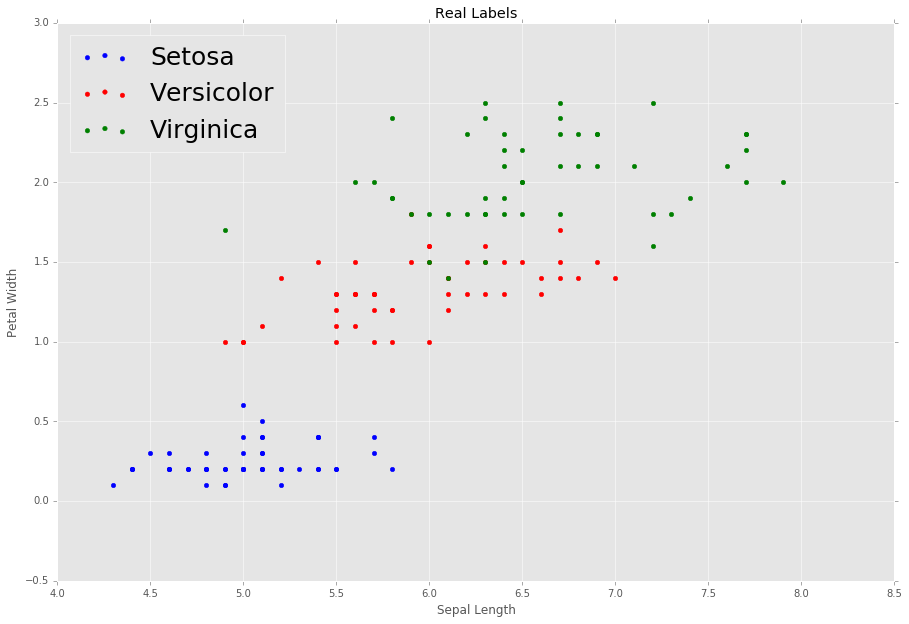

In [48]:
plt.figure(figsize=(15, 10))
plt.scatter(sX[:,0], sX[:,1], color = 'b', label = 'Setosa')
plt.scatter(cX[:,0], cX[:,1], color = 'r', label = 'Versicolor')
plt.scatter(vX[:,0], vX[:,1], color = 'g', label = 'Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 2, prop={'size':25})
plt.title('Real Labels')
labels = np.unique(tags)

# Math

In [157]:
# probability that input vector is in class c
mvpdf = lambda x, mu, cov: stats.multivariate_normal.pdf(x, mu, cov, allow_singular = True) 

# get empirical means 
means = [np.mean(X,0) for X in [sX, cX, vX]]

# get empirical covariances with regularization const. reg
def covar(X, mu):
    cov = 1 / X.shape[0] * (X - mu).T @ (X - mu)
    return cov

# predict labels of data with a regularization const.
def getLabels(X, covsGiven = False, covars = []):
    foundLabels = []
    if not covsGiven:
        covars = [covar(xmu[0], xmu[1]) 
                  for xmu in zip([sX, cX, vX], means)]
    for x in X:
        probs = []
        for muCov in zip(means, covars):   
            prob = mvpdf(x, muCov[0], muCov[1]) 
            probs += [prob]
        foundLabels += [[probs.index(max(probs))]]
    return foundLabels

foundLabels = np.array(getLabels(X))
labeledX = np.hstack((X, foundLabels))

sXf = labeledX[labeledX[:,2] == 0][:,0:2] # found sX
cXf = labeledX[labeledX[:,2] == 1][:,0:2] # found cX
vXf = labeledX[labeledX[:,2] == 2][:,0:2] # found vX

# get the accuracy of a result
def accuracy(labelX):
    numtags = [labels.tolist().index(tag) for tag in tags]
    good = 0
    for xtag in zip(labelX[:,-1], numtags):
        if xtag[0] == xtag[1]:
            good += 1
    return good / labeledX.shape[0]

0.9666666666666667


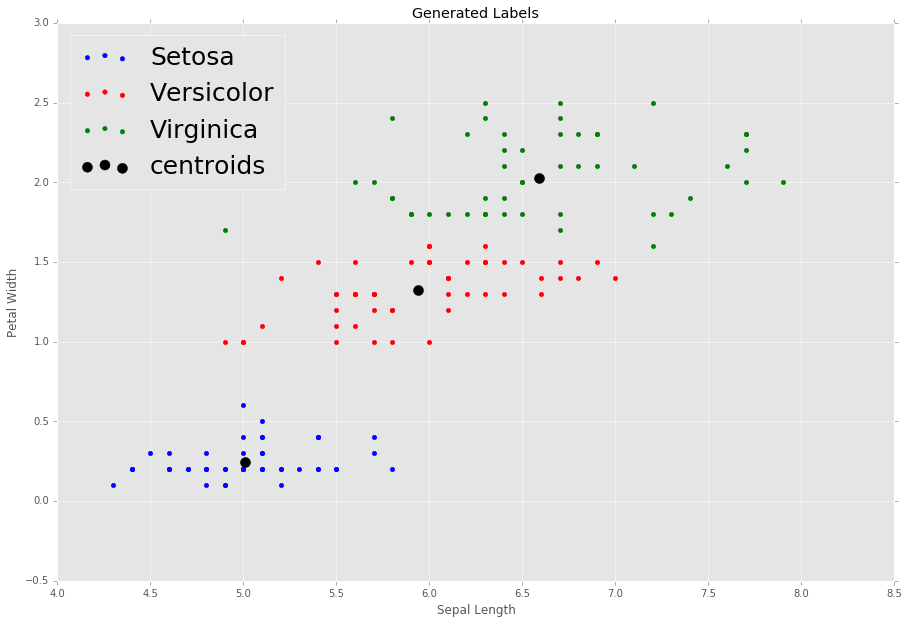

In [156]:
plt.figure(figsize=(15, 10))
plt.scatter(sXf[:,0], sXf[:,1], color = 'b', label = 'Setosa')
plt.scatter(cXf[:,0], cXf[:,1], color = 'r', label = 'Versicolor')
plt.scatter(vXf[:,0], vXf[:,1], color = 'g', label = 'Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Generated Labels')
means = np.array(means)
plt.scatter(means[:,0], means[:,1], label = 'centroids', color = 'k', s = 100)
plt.legend(loc = 2, prop={'size':25})

# Linear Normalized Accuracy

In [168]:
tiedcov = covar(X, sum(means) / 3)
normconsts = np.linspace(0, .5, 200)
accuracies = []
for reg in normconsts:
    tiedcov = reg * np.diag(np.diag(tiedcov)) + (1 - reg) * tiedcov
    covs = [tiedcov] * 3
    Xl = np.array(getLabels(X, True, covs))
    accuracies += [accuracy(Xl)]


# Plot Accuracy v. Normalization Constant

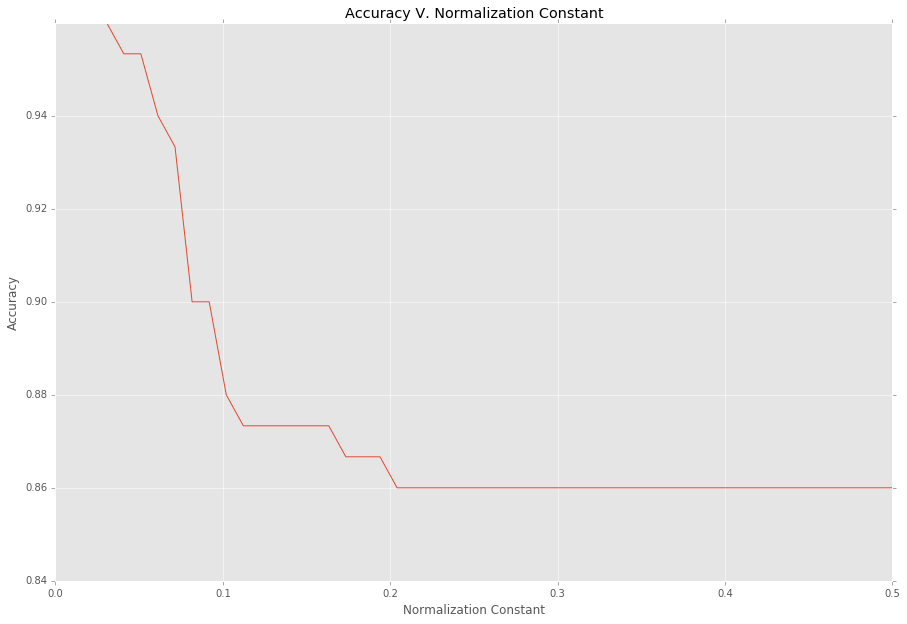

In [172]:
plt.figure(figsize = (15,10))
plt.plot(normconsts,accuracies)
plt.xlabel('Normalization Constant')
plt.ylabel('Accuracy')
plt.title('Accuracy V. Normalization Constant')